# **IRIS FLOWER CLASSIFICATION**

---



Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.


**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

**Upload Dataset**

In [2]:
data_set=pd.read_csv('Iris.csv')

**Top 5 rows of dataset**

In [3]:
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Random 10 rows**

In [4]:
data_set.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
29,30,4.7,3.2,1.6,0.2,Iris-setosa
47,48,4.6,3.2,1.4,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
3,4,4.6,3.1,1.5,0.2,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
43,44,5.0,3.5,1.6,0.6,Iris-setosa
122,123,7.7,2.8,6.7,2.0,Iris-virginica


**Total rows and columns in dataset**

In [5]:
data_set.shape

(150, 6)

In [6]:
print("Total Rows =",data_set.shape[0])
print("Total Columns =",data_set.shape[1])

Total Rows = 150
Total Columns = 6


## **DATA PROCESSING**

**Columns in dataset**

In [7]:
data_set.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**Dataset information**

In [8]:
data_set.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Statistics summary of dataset**

In [9]:
data_set.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Counting  value of each column**

In [10]:
data_set.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

**Check NULL values in dataset**

In [11]:
print("Null values :\n\n",data_set.isnull().sum())

Null values :

 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


**Size of dataset**

In [12]:
print("Size of dataset is: ",data_set.size)

Size of dataset is:  900


**check unique values of species column**

In [13]:
data_set['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## **DATA CLEANING**

**Dropping extra cols**

In [14]:
#Since the id column has no actual application in our program we'll get rid or it by, dropping the Id column by indexing
data_set = data_set.drop('Id', axis = 1)
data_set.sample(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
38,4.4,3.0,1.3,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
81,5.5,2.4,3.7,1.0,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
46,5.1,3.8,1.6,0.2,Iris-setosa
72,6.3,2.5,4.9,1.5,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica


## **DATS VISUALIZATION**

**HEAT PLOT**

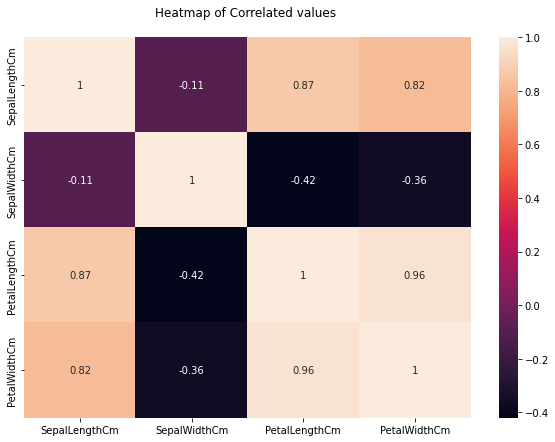

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(data_set.corr(), annot=True).set(title='Heatmap of Correlated values \n')
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
plt.show()

**HISTOGRAMS**

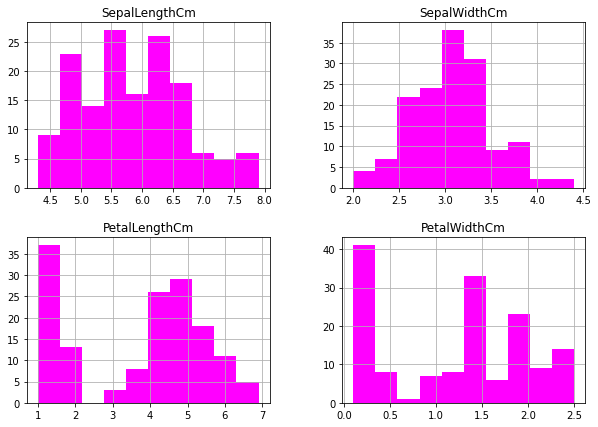

In [16]:
data_set.hist(color="magenta",figsize=(10,7))
plt.show()

**PAIR PLOT**

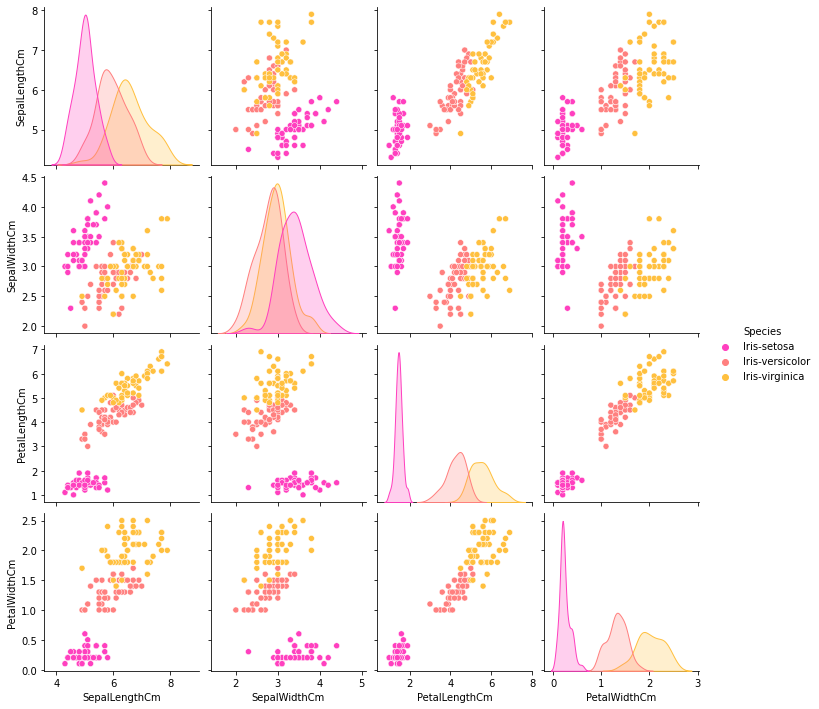

In [17]:
sns.pairplot(data_set, hue = 'Species', palette = 'spring')
plt.show()

**BAR PLOTS**

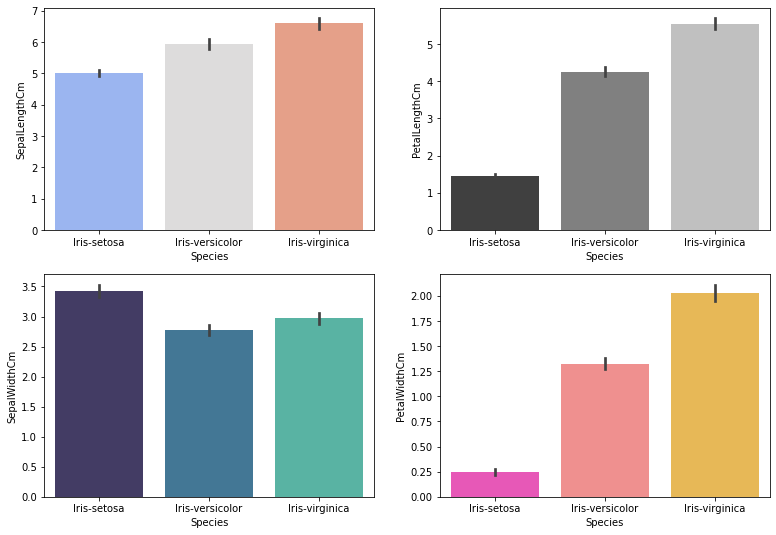

In [18]:
plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
sns.barplot(x="Species",y="SepalLengthCm",data=data_set,palette ='coolwarm')
plt.subplot(2,2,4)
sns.barplot(x="Species",y="PetalWidthCm",data=data_set,palette ='spring')
plt.subplot(2,2,2)
sns.barplot(x="Species",y="PetalLengthCm",data=data_set,palette ='gist_yarg_r')
plt.subplot(2,2,3)
sns.barplot(x="Species",y="SepalWidthCm",data=data_set,palette ='mako')

plt.show()

**PIE PLOT**

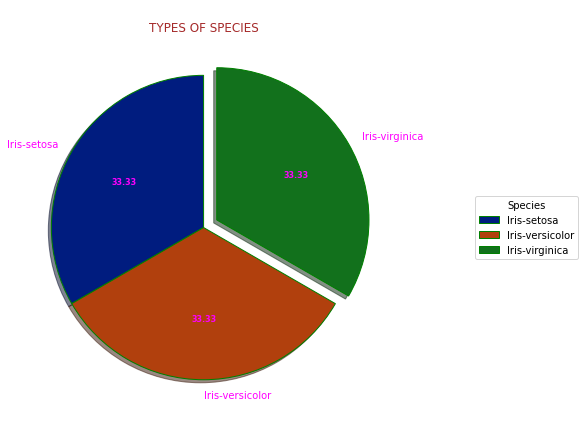

In [19]:

fig, ax = plt.subplots(figsize =(8, 7))
#labels
m=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#title for chart
ax.set_title("\nTYPES OF SPECIES",color="brown")
# Creating color parameters
color = sns.color_palette('dark')
# Creating explode data
explode = (0.0, 0.0, 0.1)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating plot
wedges, texts, autotexts = ax.pie(data_set['Species'].value_counts(),
                                  autopct = "%0.2f",
                                  explode = explode,
                                  labels = m,
                                  shadow = True,
                                  colors = color,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
# Adding legend
ax.legend(wedges,m,
          title ="Species",
          loc ="center left",
          bbox_to_anchor =(1.2, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")

plt.show()

## **MODEL BUILDING**

Before labelling

In [20]:
data_set['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**LABEL ENCODING DONE ON 'SPECIES' COLUMN**

*   0 = setosa
*   1 = Versicolor
*   2 = Virginica



In [21]:
l = LabelEncoder()

In [22]:
data_set['Species'] = l.fit_transform(data_set['Species'])

After labelling

In [23]:
data_set['Species'].unique()

array([0, 1, 2])

**SPLITTING THE DATA**

In [24]:
x = data_set.drop(columns = ['Species'])
y = data_set['Species']

In [25]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

**train and test data**

*   Training data : 80%
*   Testing data : 20%





In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

**data of training and testing**

In [28]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
132,6.4,2.8,5.6,2.2
138,6.0,3.0,4.8,1.8
51,6.4,3.2,4.5,1.5
59,5.2,2.7,3.9,1.4
129,7.2,3.0,5.8,1.6


In [29]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
13,4.3,3.0,1.1,0.1
137,6.4,3.1,5.5,1.8
18,5.7,3.8,1.7,0.3
89,5.5,2.5,4.0,1.3
42,4.4,3.2,1.3,0.2


In [30]:
y_train.head()

132    2
138    2
51     1
59     1
129    2
Name: Species, dtype: int64

In [31]:
y_test.head()

13     0
137    2
18     0
89     1
42     0
Name: Species, dtype: int64

**dimensions of training and testing data**

In [32]:
x_train.shape

(120, 4)

In [33]:
x_test.shape

(30, 4)

In [34]:
y_train.shape

(120,)

In [35]:
y_test.shape

(30,)

# **APPROACHES OF MODELS**

---



## **LOGISTIC REGRESSION**

In [36]:
model = LogisticRegression()

In [37]:
model.fit(x_train,y_train)

LogisticRegression()

**testing the data of x_test and matches with y_test**

In [38]:
y_pred = model.predict(x_test)
print(y_pred)

[0 2 0 1 0 1 1 0 0 1 0 2 2 0 0 2 0 0 2 1 1 1 2 2 0 1 0 0 2 1]


In [39]:
y_test.head(10)

13     0
137    2
18     0
89     1
42     0
56     1
68     1
27     0
35     0
79     1
Name: Species, dtype: int64

As we can see that y_pred value returned after running over x_test results the same as y_test values

Hence , model trained and predicted successfully !!

**confusion_matrix**

In [40]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  7]])

**Accuracy**

In [41]:
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is ",accuracy)

Accuracy of the model is  93.33333333333333


**Checking our predict function is working or not**

In [42]:
ans = model.predict([[1.2, 1.5, 1.6, 1.2]])
ans

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

**Results in 0 = setosa as the species**

## **SUPPORT VECTOR MACHINE**

In [43]:
model_svc=SVC()

In [44]:
model_svc.fit(x_train, y_train)

SVC()

**testing the data of x_test and matches with y_test**

In [45]:
predict = model.predict(x_test)
predict

array([0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1,
       2, 2, 0, 1, 0, 0, 2, 1])

In [46]:
y_test.head(10)

13     0
137    2
18     0
89     1
42     0
56     1
68     1
27     0
35     0
79     1
Name: Species, dtype: int64

As we can see that "predict" value returned after running over x_test results the same as y_test values

Hence , model trained and predicted successfully !!

**Accuracy**

In [47]:
print("Accuracy of the model is ",accuracy_score(y_test,predict)*100)

Accuracy of the model is  93.33333333333333


## **DECISION TREE CLASSIFIER**

In [48]:
model_tree = DecisionTreeClassifier()

In [49]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

**testing the data of x_test and matches with y_test**

In [50]:
Predict_tree = model_tree.predict(x_test)
Predict_tree

array([0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1,
       2, 2, 0, 1, 0, 0, 2, 1])

In [51]:
y_test.head(10)

13     0
137    2
18     0
89     1
42     0
56     1
68     1
27     0
35     0
79     1
Name: Species, dtype: int64

As we can see that "predict_tree" value returned after running over x_test results the same as y_test values

Hence , model trained and predicted successfully !!

**Accuracy**

In [52]:
print("Accuracy of the model is ",accuracy_score(y_test, Predict_tree)*100)

Accuracy of the model is  93.33333333333333


## **KNN ALGORITHM**

In [53]:
standard_scaler = StandardScaler().fit(x_train)
x_train_std = standard_scaler.transform(x_train)
x_test_std = standard_scaler.transform(x_test)

In [54]:
model_knn=KNeighborsClassifier(n_neighbors=5)

In [55]:
model_knn.fit(x_train_std,y_train)

KNeighborsClassifier()

**testing the data of x_test and matches with y_test**

In [56]:
predict_knn=model_knn.predict(x_test_std)
predict_knn

array([0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1,
       2, 2, 0, 1, 0, 0, 2, 1])

In [57]:
y_test.head(10)

13     0
137    2
18     0
89     1
42     0
56     1
68     1
27     0
35     0
79     1
Name: Species, dtype: int64

As we can see that "predict_knn" value returned after running over x_test results the same as y_test values

Hence , model trained and predicted successfully !!

**Accuracy**

In [58]:
print("Accuracy of the model is ",accuracy_score(y_test,predict_knn)*100)

Accuracy of the model is  93.33333333333333
